# A2: Group Project
##### Date: 2 / 20 / 2025

    Group Members: Abi Joshua GEORG / Eri Yoshimoto / Hakeem GARCIA / Nattida TAVAROJN / Neha NAGABHUSHAN / Weikang YANG
---

## Part 1 - About Dataset
### General Info
* ##### Data source:
> Kaggle: https://www.kaggle.com/datasets/keremkurt/diversity-equity-and-inclusion-measures-dataset?utm_source=chatgpt.com

* This data set is generated to simulate an employee data set of a company including sensitive information such as gender, sexual orientation, ethnicity, LGBTQ, and much more. The goal of this data set is to improve Diversity, Equity, and Inclusion in the workplace.

### Survey Questions and Scores
* The main idea of the survey is to track whether the company's efforts in improving DEI actually work and to discover if any group(coming from different backgrounds such as different gender, ethnicity, sexual orientation etc.) falls behind. The survey can be repeated periodically to measure the impact of the company's efforts.

* There are 5 survey questions for each of the DEI categories. Survey scores of employees are also shown in the data set.

## Problem Statement
* 1. xxxxxxxxxxxxxxx
* 2. xxxxxxxxxxxxxxx
* 3. xxxxxxxxxxxxx


## Part 2 - Clean the Row Data

* #### Import the Necessary Libarary 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

* #### Read & Clean the Data

In [28]:

file_path = "employee_data.csv"
df_new = pd.read_csv(file_path)

# 进行数据清理

# 1. 处理缺失值：ExitDate 和 TerminationDescription 为空的用 'Still Employed' 填充
df_new["ExitDate"].fillna("Still Employed", inplace=True)
df_new["TerminationDescription"].fillna("Still Employed", inplace=True)

# 2. 处理日期格式（StartDate 和 ExitDate）
df_new["StartDate"] = pd.to_datetime(df_new["StartDate"], errors="coerce", format="%d-%b-%y")
df_new["ExitDate"] = df_new["ExitDate"].apply(lambda x: pd.to_datetime(x, errors="coerce", format="%d-%b-%y") if x != "Still Employed" else x)
df_new["DOB"] = pd.to_datetime(df_new["DOB"], errors="coerce", format="%d-%m-%Y")

# 3. 统一数值列的数据类型
numeric_columns = ["EmpID", "LocationCode", "Current Employee Rating"]
df_new[numeric_columns] = df_new[numeric_columns].apply(pd.to_numeric, errors="coerce")

# 4. 处理重复值
df_new.drop_duplicates(inplace=True)

# 5. 重置索引
df_new.reset_index(drop=True, inplace=True)

# 显示清理后的基本信息
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       3000 non-null   int64         
 1   FirstName                   3000 non-null   object        
 2   LastName                    3000 non-null   object        
 3   StartDate                   3000 non-null   datetime64[ns]
 4   ExitDate                    3000 non-null   object        
 5   Title                       3000 non-null   object        
 6   Supervisor                  3000 non-null   object        
 7   ADEmail                     3000 non-null   object        
 8   BusinessUnit                3000 non-null   object        
 9   EmployeeStatus              3000 non-null   object        
 10  EmployeeType                3000 non-null   object        
 11  PayZone                     3000 non-null   object      

C:\Users\weika\AppData\Local\Temp\ipykernel_223656\585624572.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new["ExitDate"].fillna("Still Employed", inplace=True)
C:\Users\weika\AppData\Local\Temp\ipykernel_223656\585624572.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

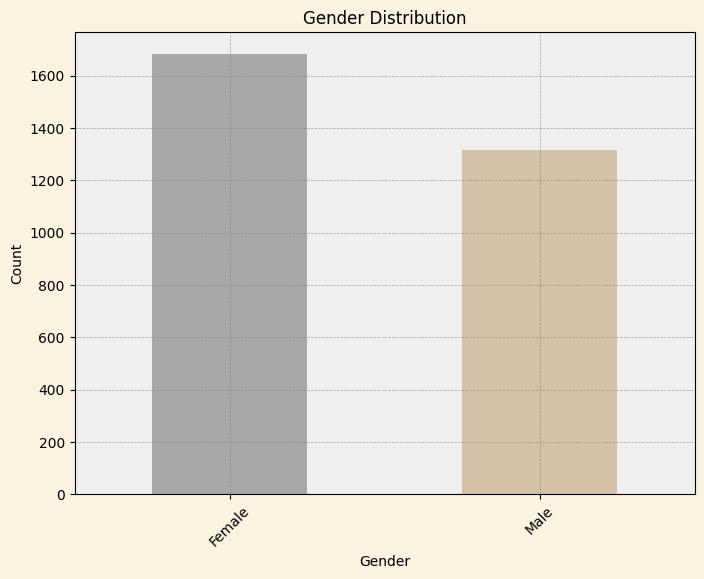

In [30]:
import matplotlib.pyplot as plt

# 可视化 1：性别分布
plt.figure(figsize=(8, 6))
df_new["GenderCode"].value_counts().plot(kind="bar", color=["#A8A8A8", "#D4C1A7", "#A3B4A2"])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor("#EFEFEF")
plt.show()



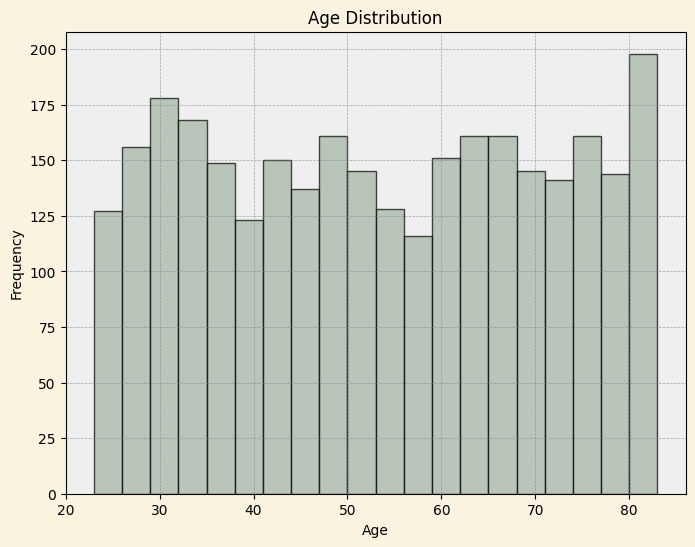

In [40]:

# 可视化 4：年龄分布直方图
plt.figure(figsize=(8, 6))
age_series = (pd.to_datetime("today") - df_new["DOB"]).dt.days // 365  # 计算年龄
plt.hist(age_series, bins=20, edgecolor="black", alpha=0.7, color="#A3B4A2")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor("#EFEFEF")
plt.show()

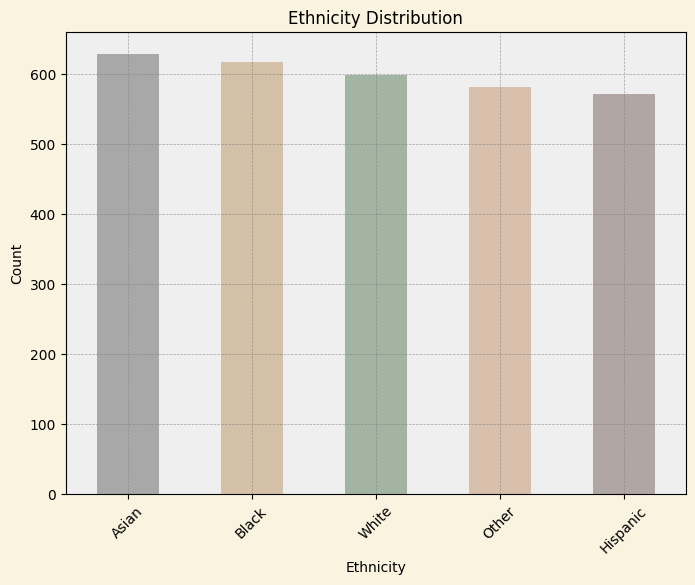

In [32]:
# 可视化 2：种族分布
plt.figure(figsize=(8, 6))
df_new["RaceDesc"].value_counts().plot(kind="bar", color=["#A8A8A8", "#D4C1A7", "#A3B4A2", "#D8C0AD", "#B0A6A4"])
plt.title("Ethnicity Distribution")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor("#EFEFEF")
plt.show()


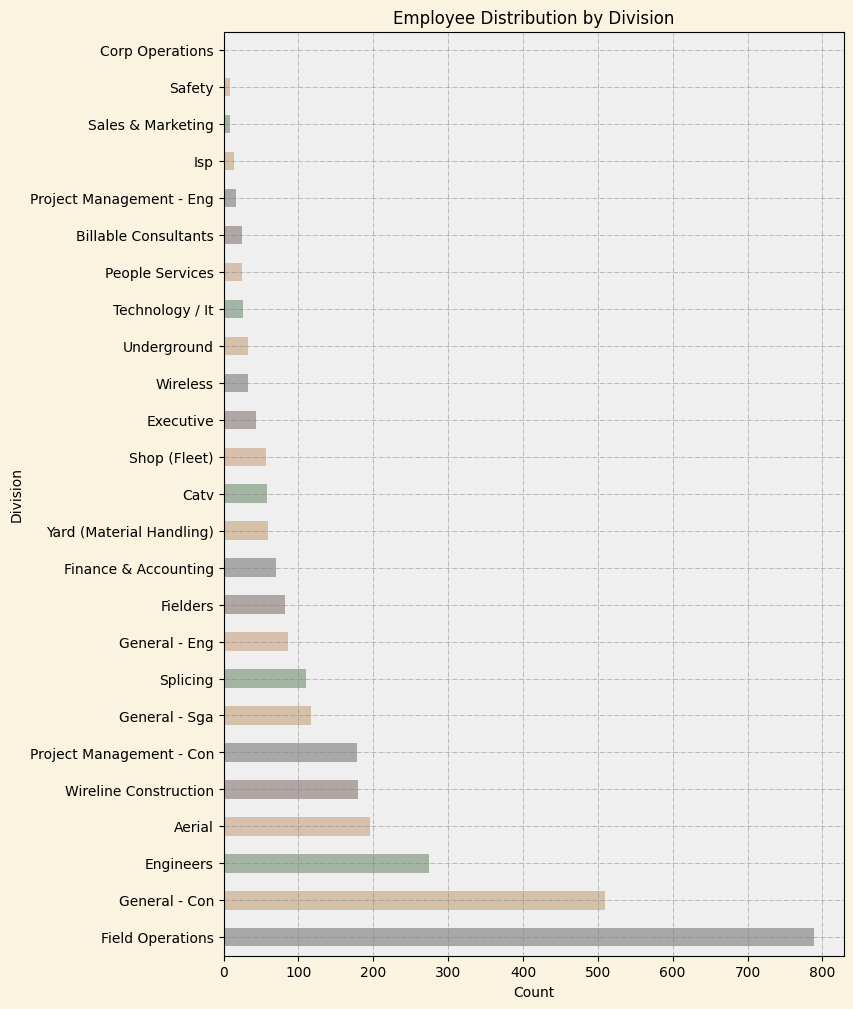

In [39]:
# 绘制纵向（水平）条形图
plt.figure(figsize=(8, 12))  # 调整尺寸适应纵向
df_new["Division"].value_counts().plot(kind="barh", color=["#A8A8A8", "#D4C1A7", "#A3B4A2", "#D8C0AD", "#B0A6A4"])

# 添加标题和标签
plt.title("Employee Distribution by Division")
plt.xlabel("Count")
plt.ylabel("Division")
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.7)

# 设置背景色
plt.gca().set_facecolor("#EFEFEF")

# 显示图表
plt.show()
